In [109]:
import quandl as qndl
import datetime as dtime

# Getting the Goldman Sachs stock dataset for a 6-month period:
qndl.ApiConfig.api_key = "1j7PHpz1kT9sozHM3f6e"
stock_prices_df = qndl.get("EOD/GS", start_date = "2018-08-05", end_date = dtime.date.today(), collapse = "daily")
print(stock_prices_df)

              Open      High       Low   Close     Volume  Dividend  Split  \
Date                                                                         
2018-08-06  234.14  236.9800  234.0300  235.93  2259700.0       0.0    1.0   
2018-08-07  237.25  239.4600  236.4900  237.83  2399530.0       0.0    1.0   
2018-08-08  238.12  239.1600  236.2300  236.37  2522353.0       0.0    1.0   
2018-08-09  236.35  236.8450  233.3900  233.78  2952021.0       0.0    1.0   
2018-08-10  230.97  231.4550  228.1100  229.61  3863732.0       0.0    1.0   
2018-08-13  229.49  229.8900  226.5700  226.86  2662772.0       0.0    1.0   
2018-08-14  227.35  230.3700  227.3000  229.56  2357141.0       0.0    1.0   
2018-08-15  229.35  231.5400  228.3100  229.25  3218716.0       0.0    1.0   
2018-08-16  230.67  233.2900  230.4500  233.00  2435929.0       0.0    1.0   
2018-08-17  232.51  233.7200  231.6400  233.38  2107233.0       0.0    1.0   
2018-08-20  234.13  235.9750  234.0750  235.78  2604865.0       

In [110]:
import numpy as nmpy
from sklearn.model_selection import train_test_split

stock_prices_df = stock_prices_df.reset_index() # Assigned indices correspond to individual rows in the dataframe
out_stockprices = stock_prices_df['Adj_Close'].tolist() #The Adj_Close column of the stock dataframe is converted to a list
in_datetime = stock_prices_df.index.tolist() #Date can be represented in terms of the indexed rows, where 0 refers to 2018-06-01

train_date = []
test_date = []
train_stock_prices = []
test_stock_prices = []
train_date, test_date, train_stock_prices, test_stock_prices = train_test_split(in_datetime, out_stockprices, train_size = 0.75, test_size = 0.25) #The training and testing datasets are split accordingly

#The lists are converted to numpy arrays
train_date = nmpy.array(train_date)
test_date = nmpy.array(test_date)
train_stock_prices = nmpy.array(train_stock_prices)
test_stock_prices = nmpy.array(test_stock_prices)

#The numpy arrays are converted to 1D vectors:
#num_train_days = len(train_date)
#num_test_days = len(test_date)
#num_train_stockprices = len(train_stock_prices)
#num_test_stockprices = len(test_stock_prices)
train_date = train_date.reshape(-1, 1)
test_date = test_date.reshape(-1, 1)
#train_stock_prices = train_stock_prices.reshape(num_train_stockprices, 1)
#test_stock_prices = test_stock_prices.reshape(num_test_stockprices, 1)

print(train_date)
print(test_date)
print(train_stock_prices)
print(test_stock_prices)


[[14]
 [37]
 [64]
 [62]
 [22]
 [ 5]
 [30]
 [54]
 [48]
 [15]
 [60]
 [ 0]
 [43]
 [ 1]
 [65]
 [55]
 [23]
 [51]
 [38]
 [ 2]
 [25]
 [52]
 [56]
 [26]
 [45]
 [36]
 [ 3]
 [34]
 [19]
 [20]
 [28]
 [57]
 [53]
 [47]
 [ 8]
 [40]
 [ 7]
 [32]
 [66]
 [ 6]
 [29]
 [33]
 [59]
 [49]
 [67]
 [41]
 [39]
 [ 9]
 [16]
 [10]
 [68]]
[[18]
 [17]
 [12]
 [46]
 [27]
 [31]
 [35]
 [21]
 [61]
 [42]
 [44]
 [24]
 [11]
 [58]
 [50]
 [13]
 [ 4]
 [63]]
[234.33341866 227.74       228.72       226.97       234.52
 226.11066887 228.89       221.6        213.87       241.79867878
 219.28       235.15071016 225.71       237.04443435 228.2
 218.56       233.91       228.28       224.24       235.58925681
 230.21       224.95       209.18       228.15       222.91
 228.88       233.00781173 232.9        237.81       237.66
 229.24       214.01       226.96       212.97       232.23038811
 226.07       228.49277457 237.4        231.28       228.80175062
 227.89       235.34       214.49       215.22       231.65
 227.78       225.33 

In [111]:
from sklearn.linear_model import LinearRegression as LinReg

lin_reg = LinReg()
lin_reg.fit(train_date, train_stock_prices)
pred_stock_prices = lin_reg.predict(test_date)

print(pred_stock_prices)


[231.83439991 232.05813049 233.1767834  225.5699436  229.82082467
 228.92590234 228.03098001 231.16320816 222.21398487 226.46486593
 226.01740477 230.49201641 233.40051398 222.88517661 224.67502127
 232.95305282 234.96662806 221.7665237 ]


In [112]:
print(lin_reg.score(test_date, test_stock_prices)*100)

42.727093657696614


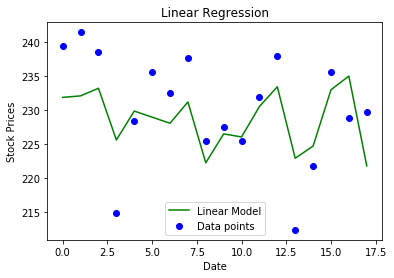

In [114]:
import matplotlib.pyplot as plot

#Linear Regression:
plot.scatter(range(len(test_stock_prices)), test_stock_prices, color = "blue", label = "Data points")
plot.plot(range(len(test_stock_prices)), pred_stock_prices, color = "green", label = "Linear Model")
plot.xlabel("Date")
plot.ylabel("Stock Prices")
plot.title("Linear Regression")
plot.legend()
plot.show()